In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Obtener el directorio actual del script
# directorio_actual = os.path.abspath(os.path.dirname(__file__)) Funcionaba cuando era un archivo '.py'
directorio_actual = os.path.dirname(os.path.abspath('disturbance_creator'))
directorio_destino = os.path.join(directorio_actual, 'original_signals')

# Creamos todas las carpetas antes de iniciar el bucle.

os.makedirs(directorio_destino, exist_ok=True)
os.makedirs(os.path.join('original_signals', 'test'), exist_ok=True)
os.makedirs(os.path.join('original_signals', 'train'), exist_ok=True)
os.makedirs(os.path.join('original_signals', 'val'), exist_ok=True)

def original_signal():
    total_signals = 3600
    num_iterations = 3  # Triplicar las señales
    signals_per_iteration = total_signals
    total_generated = num_iterations * signals_per_iteration

    for iteration in range(3):
        for i in range(3601):  # Procesar las 3600 señales completas por iteración
            nombre_archivo = f"or_s_{i}.npy"
            ruta_archivo = os.path.join(directorio_actual, 'original_signal', nombre_archivo)

            if os.path.exists(ruta_archivo):
                # Cargar los datos desde el archivo .npy
                data = np.load(ruta_archivo)
                # Normalizar la señal al rango para una potencia unitaria RMS
                signal_original = data / np.sqrt(np.mean(data**2))

                # Determinar la carpeta de destino
                index_global = iteration * signals_per_iteration + i
                if index_global < 7601:
                    directorio_destino_final = os.path.join(directorio_destino, 'train')
                elif index_global < 9181:
                    directorio_destino_final = os.path.join(directorio_destino, 'test')
                else:
                    directorio_destino_final = os.path.join(directorio_destino, 'val')

                nombre_archivo_nuevo = f"or_s_{index_global}.npy"
                ruta_archivo_nuevo = os.path.join(directorio_destino_final, nombre_archivo_nuevo)
                np.save(ruta_archivo_nuevo, signal_original)

original_signal()

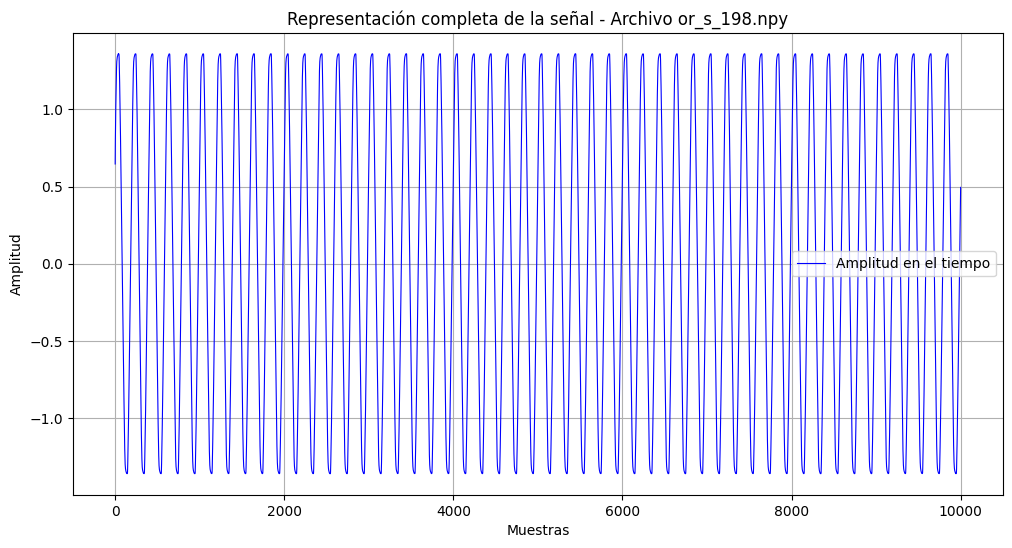

In [5]:
# Generar un número aleatorio entre 1 y 3600 para seleccionar el archivo
import random

archivo_numero = random.randint(1, 2000)
archivo_path = os.path.join(os.getcwd(), 'original_signals','train',f'or_s_{archivo_numero}.npy')

# Cargar el archivo completo
signal_data = np.load(archivo_path)

# Graficar todos los datos de la señal
plt.figure(figsize=(12, 6))
plt.plot(signal_data, color='b', linestyle='-', linewidth=0.8, label='Amplitud en el tiempo')
plt.title(f"Representación completa de la señal - Archivo or_s_{archivo_numero}.npy")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()